## Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import pandas as pd


## Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Housing.csv')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Select features and target
X = df.drop('price', axis=1)
y = df['price']

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Scale the encoded features
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [15]:
X_train_encoded

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,True,False,False,False,True,False,False,True
106,5450,4,2,1,0,True,False,True,False,True,True,True,False
270,4500,3,2,3,1,True,False,False,True,False,False,False,False
435,4040,2,1,1,0,True,False,False,False,False,False,False,True


## Polynomial Expansion

In [16]:
poly = PolynomialFeatures(degree=2)  # Try 2, 3, etc.
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


## Train Models

#### Linear regression

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred = lin_reg.predict(X_test_poly)

print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("Linear Regression R2:", r2_score(y_test, y_pred))

Linear Regression RMSE: 1379016.4661621877
Linear Regression R2: 0.6237689217365157


## Ridge & Lasso

In [19]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [ 0.00000000e+00  4.81191875e+05  9.85419623e+04  4.23040728e+05
  2.23588263e+05  2.76497607e+05  3.57008606e+04  2.36300675e+04
  1.77622865e+05 -3.66029972e+02  1.36531305e+05  9.89690385e+04
  3.95961200e+04 -9.20075973e+04 -5.70151258e+04 -1.19844613e+04
  1.35580605e+05 -7.20708202e+04 -9.03261487e+04  1.47691862e+04
 -2.08839488e+05  1.12857228e+05 -1.18993435e+05  6.95457074e+04
  2.00023840e+04 -8.97909747e+03 -5.02018497e+04 -2.00059861e+04
  8.98242220e+04 -8.83592748e+04  1.22002680e+05  7.42736381e+03
  1.20987226e+05 -5.61209127e+04  1.70131535e+05 -4.61078967e+04
  3.98388914e+03 -1.67751259e+05 -1.23645007e+05  2.51821246e+04
 -1.17348114e+05  3.53588270e+03  3.88543113e+04 -7.16582187e+04
 -1.62472662e+05 -7.97065075e+04  1.62843969e+05  1.16936111e+05
  1.12910691e+05  1.15801001e+05  1.14335044e+05  2.24956736e+04
  2.06294574e+04 -9.88107576e+04  3.24240187e+04 -7.96018872e+04
  8.75403792e+04  5.42184830e+04  4.18449437e+04  9.28892602e+04
 -1.0

## SGD

In [20]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train_poly, y_train)


SGDRegressor()

##  Plot Learning Curves

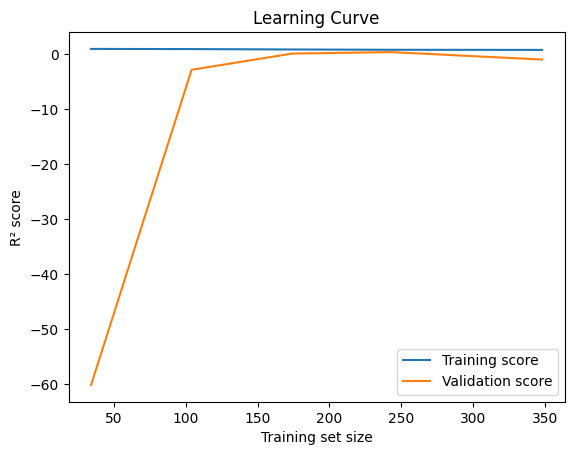

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    lin_reg, X_train_poly, y_train, cv=5, scoring='r2',
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('R² score')
plt.legend()
plt.title('Learning Curve')
plt.show()


## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1.0, 10]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_train_poly, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)


Best alpha: {'alpha': 10}
Best score: 0.5757996974676866


## 1. Why did some algorithms perform better or worse?


Linear vs Ridge vs Lasso:

Linear Regression might overfit if features are highly correlated.

Ridge helps when you have multicollinearity by shrinking coefficients.

Lasso can shrink irrelevant features to zero → useful for feature selection.

Elastic Net balances Ridge and Lasso — best when you have many correlated predictors.

SGD Regressor:

May converge slower if learning rate is not well tuned.

Faster for large datasets because it uses batches.

Logistic Regression:

Good baseline for classification.

Decision boundary is linear — may underperform on highly non-linear data unless you add polynomial features.



In [33]:
import time

# Initialize results list
results = []

# === Linear Regression ===
start = time.time()
lin_reg.fit(X_train_poly, y_train)
end = time.time()

y_pred = lin_reg.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

results.append({
    'Model': 'Linear Regression',
    'RMSE': rmse,
    'R2': r2,
    'Accuracy': None,
    'F1-score': None,
    'Training Time (s)': end - start,
    'Key Coefficients': lin_reg.coef_.tolist()
})

# === Ridge Regression ===
start = time.time()
ridge.fit(X_train_poly, y_train)
end = time.time()

y_pred = ridge.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

results.append({
    'Model': 'Ridge Regression',
    'RMSE': rmse,
    'R2': r2,
    'Accuracy': None,
    'F1-score': None,
    'Training Time (s)': end - start,
    'Key Coefficients': ridge.coef_.tolist()
})

# === Lasso Regression ===
start = time.time()
lasso.fit(X_train_poly, y_train)
end = time.time()

y_pred = lasso.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

results.append({
    'Model': 'Lasso Regression',
    'RMSE': rmse,
    'R2': r2,
    'Accuracy': None,
    'F1-score': None,
    'Training Time (s)': end - start,
    'Key Coefficients': lasso.coef_.tolist()
})

# === SGD Regressor ===
start = time.time()
sgd.fit(X_train_poly, y_train)
end = time.time()

y_pred = sgd.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

results.append({
    'Model': 'SGD Regressor',
    'RMSE': rmse,
    'R2': r2,
    'Accuracy': None,
    'F1-score': None,
    'Training Time (s)': end - start,
    'Key Coefficients': sgd.coef_.tolist()
})

# === Final Comparison Table ===
comparison_table = pd.DataFrame(results)

print("\n=== Model Comparison Table ===")
print(comparison_table)

# Optional: Save to CSV
comparison_table.to_csv('/content/drive/MyDrive/model_comparison.csv', index=False)


=== Model Comparison Table ===
               Model          RMSE        R2 Accuracy F1-score  \
0  Linear Regression  1.379016e+06  0.623769     None     None   
1   Ridge Regression  1.378292e+06  0.624164     None     None   
2   Lasso Regression  1.378611e+06  0.623990     None     None   
3      SGD Regressor  1.372279e+06  0.627436     None     None   

   Training Time (s)                                   Key Coefficients  
0           0.007025  [1.4896749821604235e-11, 481893.42770588957, 9...  
1           0.002556  [0.0, 481191.87464203057, 98541.96232523173, 4...  
2           0.061733  [0.0, 481893.5234835468, 96909.27952331581, 42...  
3           0.008968  [765669.9907806836, 480940.1558894882, 104368....  
